<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/C1Spread1_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [195]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

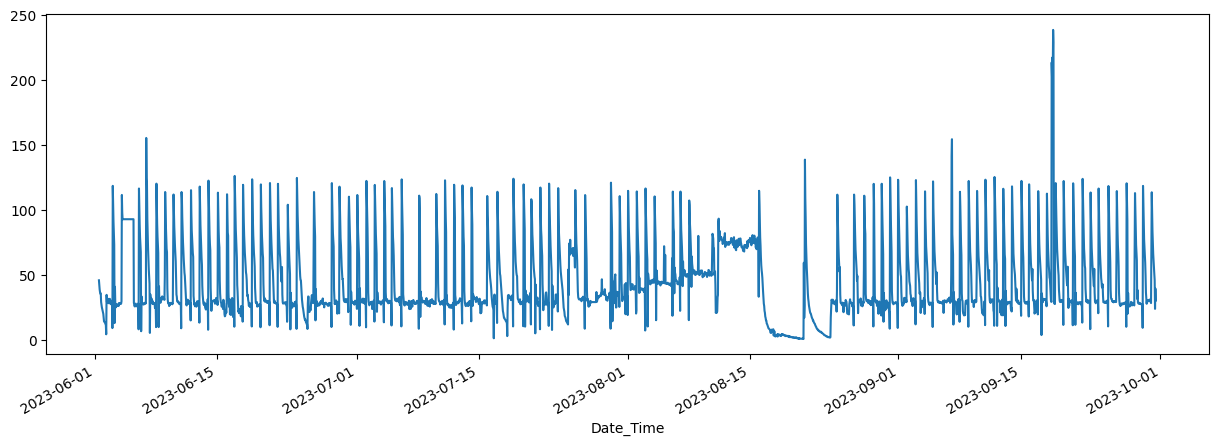

In [153]:
df = pd.read_csv('C1 Spread 1 from 06 to 09_outlier_removal.csv', index_col='Date_Time', parse_dates=True)
df["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [154]:
df.head()

,BPC1 1MGHMV013XI,Combust Monitor Actual Spread 1,GT Exhaust Outlet Temp,Turbine Speed In RPM,GT Gross MW,GT Turbine Inlet Temperature,GT Exhaust Outlet Temp Exp,Ambient Dry Bulb Temperature,Barometric Pressure,Relative Humidity
Date_Time,,,,,,,,,,
2023-06-01 11:10:14,"06/01/2023 11:10:14, 46.084114074707",46.084114,0.0,5.242575,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 12:10:14,"06/01/2023 12:10:14, 42.6662826538086",42.666283,0.0,5.247316,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 13:10:14,"06/01/2023 13:10:14, 38.970344543457",38.970345,0.0,5.247211,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 14:10:14,"06/01/2023 14:10:14, 36.9424591064453",36.942459,0.0,5.242203,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 15:10:14,"06/01/2023 15:10:14, 35.7623672485352",35.762367,0.0,5.246573,0.0,0.0,0.0,0.0,0.0,0.0


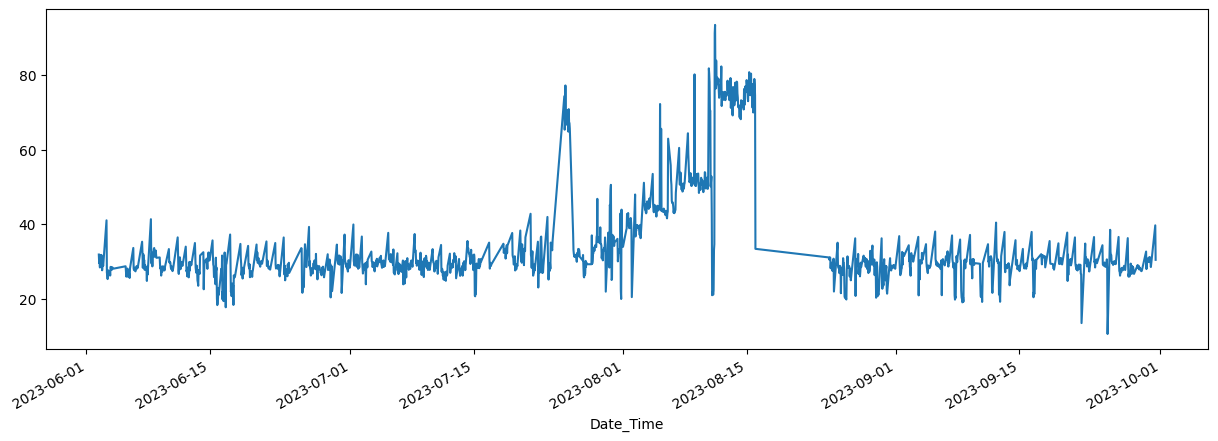

In [155]:
df[df["GT Gross MW"]>0]["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [156]:

#Power0 = df[df["GT Gross MW"] ==0].index
#GETE0 = df[df["GT Exhaust Outlet Temp Exp"] ==0].index

#print(np.all(Power0 == GETE0))

In [157]:
df.head()

,BPC1 1MGHMV013XI,Combust Monitor Actual Spread 1,GT Exhaust Outlet Temp,Turbine Speed In RPM,GT Gross MW,GT Turbine Inlet Temperature,GT Exhaust Outlet Temp Exp,Ambient Dry Bulb Temperature,Barometric Pressure,Relative Humidity
Date_Time,,,,,,,,,,
2023-06-01 11:10:14,"06/01/2023 11:10:14, 46.084114074707",46.084114,0.0,5.242575,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 12:10:14,"06/01/2023 12:10:14, 42.6662826538086",42.666283,0.0,5.247316,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 13:10:14,"06/01/2023 13:10:14, 38.970344543457",38.970345,0.0,5.247211,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 14:10:14,"06/01/2023 14:10:14, 36.9424591064453",36.942459,0.0,5.242203,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 15:10:14,"06/01/2023 15:10:14, 35.7623672485352",35.762367,0.0,5.246573,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
df_p = df[['Combust Monitor Actual Spread 1']].copy()

In [159]:
df_p['Date_Time'] = df_p.index

In [160]:
df_p.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-06-01 11:10:14,46.084114,2023-06-01 11:10:14
2023-06-01 12:10:14,42.666283,2023-06-01 12:10:14
2023-06-01 13:10:14,38.970345,2023-06-01 13:10:14
2023-06-01 14:10:14,36.942459,2023-06-01 14:10:14
2023-06-01 15:10:14,35.762367,2023-06-01 15:10:14


In [161]:
df_p.tail()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-09-30 07:10:14,51.038200,2023-09-30 07:10:14
2023-09-30 08:10:14,46.250725,2023-09-30 08:10:14
2023-09-30 09:10:14,24.120710,2023-09-30 09:10:14
2023-09-30 10:10:14,39.756451,2023-09-30 10:10:14
2023-09-30 11:10:14,30.507504,2023-09-30 11:10:14


In [162]:
df_p.columns = ['y', 'ds']

In [163]:
df_p.head()

,y,ds
Date_Time,,
2023-06-01 11:10:14,46.084114,2023-06-01 11:10:14
2023-06-01 12:10:14,42.666283,2023-06-01 12:10:14
2023-06-01 13:10:14,38.970345,2023-06-01 13:10:14
2023-06-01 14:10:14,36.942459,2023-06-01 14:10:14
2023-06-01 15:10:14,35.762367,2023-06-01 15:10:14


In [164]:
m = Prophet()

In [165]:
m.fit(df_p)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/2p1zu5ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/p94d71gf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75121', 'data', 'file=/tmp/tmpsjz2s1nd/2p1zu5ep.json', 'init=/tmp/tmpsjz2s1nd/p94d71gf.json', 'output', 'file=/tmp/tmpsjz2s1nd/prophet_modelpjevadkm/prophet_model-20231017141446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [166]:
future = m.make_future_dataframe(periods=200, freq = 'H')

In [167]:
future.tail()

,ds
3100,2023-10-08 15:10:14
3101,2023-10-08 16:10:14
3102,2023-10-08 17:10:14
3103,2023-10-08 18:10:14
3104,2023-10-08 19:10:14


In [168]:
forecast = m.predict(future)

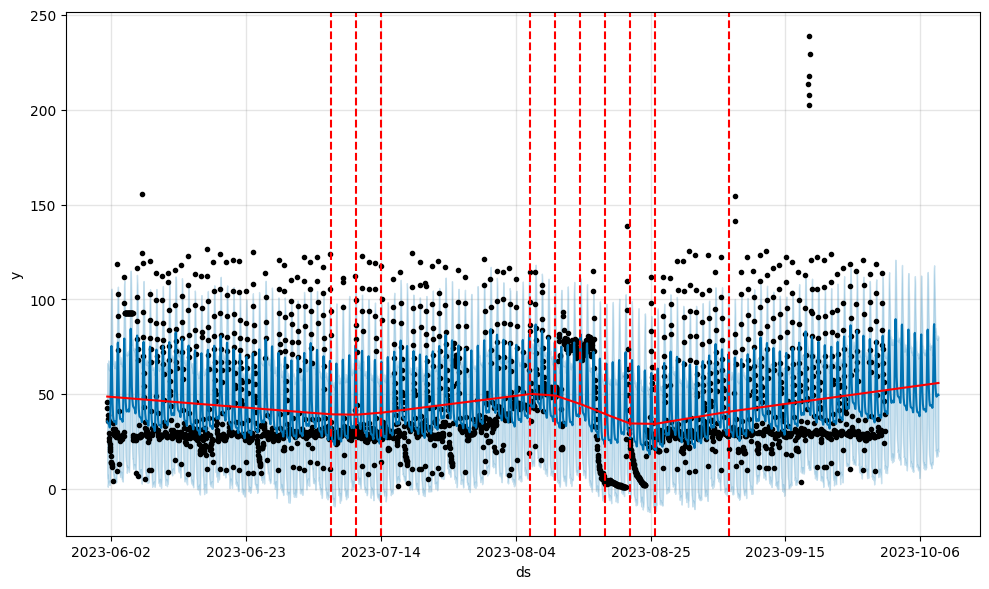

In [169]:
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

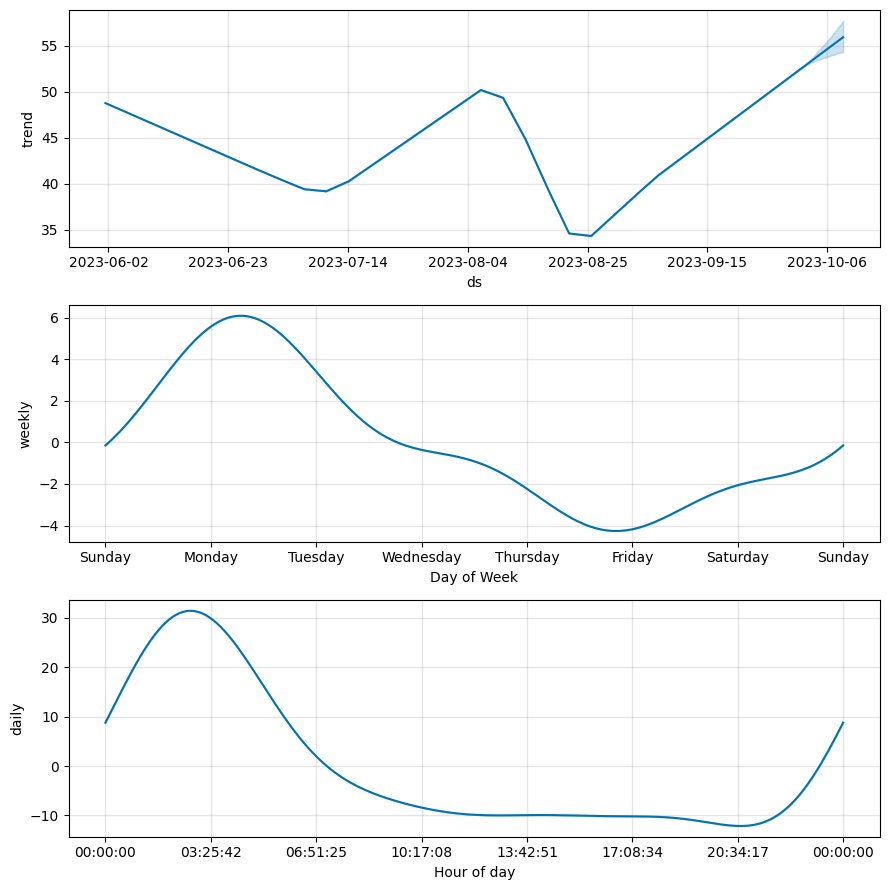

In [170]:
m.plot_components(forecast);

In [171]:
forecast.tail(500)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2605,2023-09-18 00:10:14,46.315973,31.963500,93.631089,46.315973,46.315973,16.454556,16.454556,16.454556,10.861420,10.861420,10.861420,5.593136,5.593136,5.593136,0.0,0.0,0.0,62.770528
2606,2023-09-18 01:10:14,46.335284,39.524907,104.474428,46.335284,46.335284,28.263652,28.263652,28.263652,22.534158,22.534158,22.534158,5.729495,5.729495,5.729495,0.0,0.0,0.0,74.598936
2607,2023-09-18 02:10:14,46.354595,53.274082,113.244588,46.354595,46.354595,35.932742,35.932742,35.932742,30.087586,30.087586,30.087586,5.845155,5.845155,5.845155,0.0,0.0,0.0,82.287336
2608,2023-09-18 03:10:14,46.373906,51.376318,112.151852,46.373906,46.373906,36.748918,36.748918,36.748918,30.809607,30.809607,30.809607,5.939311,5.939311,5.939311,0.0,0.0,0.0,83.122824
2609,2023-09-18 04:10:14,46.393217,46.764103,106.863174,46.393217,46.393217,31.102587,31.102587,31.102587,25.091260,25.091260,25.091260,6.011326,6.011326,6.011326,0.0,0.0,0.0,77.495803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,2023-10-08 15:10:14,55.874970,17.403157,79.604225,54.331843,57.585915,-6.350435,-6.350435,-6.350435,-9.988715,-9.988715,-9.988715,3.638280,3.638280,3.638280,0.0,0.0,0.0,49.524535
3101,2023-10-08 16:10:14,55.894281,21.294447,81.026056,54.340695,57.625922,-6.217308,-6.217308,-6.217308,-10.119278,-10.119278,-10.119278,3.901971,3.901971,3.901971,0.0,0.0,0.0,49.676974
3102,2023-10-08 17:10:14,55.913593,20.461934,79.389015,54.349548,57.663269,-6.013588,-6.013588,-6.013588,-10.171557,-10.171557,-10.171557,4.157969,4.157969,4.157969,0.0,0.0,0.0,49.900005
3103,2023-10-08 18:10:14,55.932904,20.139006,80.621593,54.344992,57.709252,-5.929948,-5.929948,-5.929948,-10.334450,-10.334450,-10.334450,4.404502,4.404502,4.404502,0.0,0.0,0.0,50.002956


In [172]:
df_p2 = df[df['GT Gross MW'] > 0][['Combust Monitor Actual Spread 1']].copy()
df_p2['Date_Time'] = df_p2.index

In [173]:
df_p2.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-06-02 10:10:14,31.929834,2023-06-02 10:10:14
2023-06-02 11:10:14,29.635532,2023-06-02 11:10:14
2023-06-02 12:10:14,30.289629,2023-06-02 12:10:14
2023-06-02 13:10:14,28.462751,2023-06-02 13:10:14
2023-06-02 14:10:14,31.812954,2023-06-02 14:10:14


In [191]:
df_p2.columns = ['y', 'ds']
df_p2.head()

,y,ds
Date_Time,,
2023-06-02 10:10:14,31.929834,2023-06-02 10:10:14
2023-06-02 11:10:14,29.635532,2023-06-02 11:10:14
2023-06-02 12:10:14,30.289629,2023-06-02 12:10:14
2023-06-02 13:10:14,28.462751,2023-06-02 13:10:14
2023-06-02 14:10:14,31.812954,2023-06-02 14:10:14


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/pnez69rs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/1f5_7q12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86092', 'data', 'file=/tmp/tmpsjz2s1nd/pnez69rs.json', 'init=/tmp/tmpsjz2s1nd/1f5_7q12.json', 'output', 'file=/tmp/tmpsjz2s1nd/prophet_model4vxz1ljn/prophet_model-20231017141457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


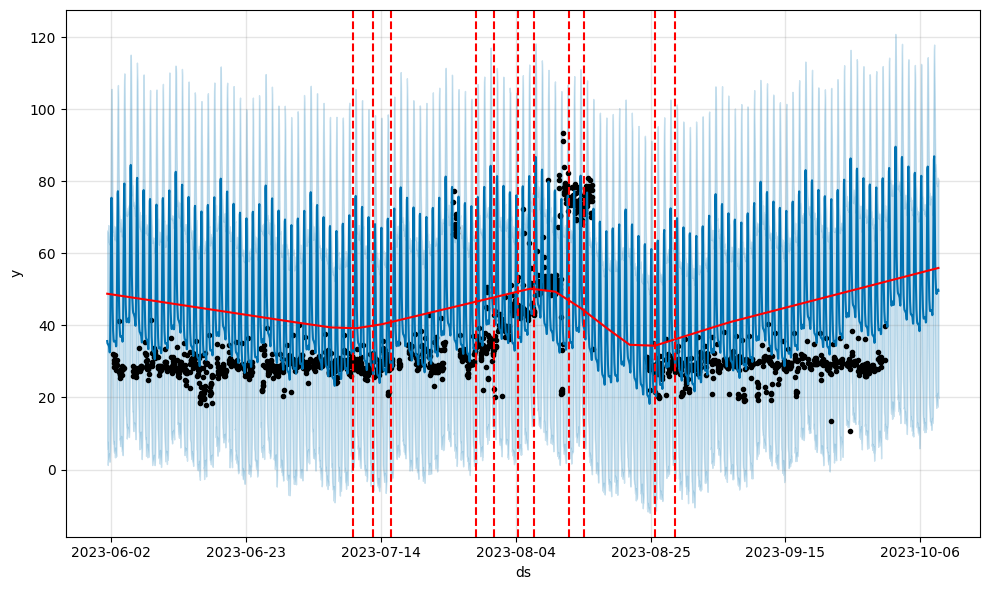

In [175]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods=100, freq = 'H')
forecast2 = m2.predict(future2)
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

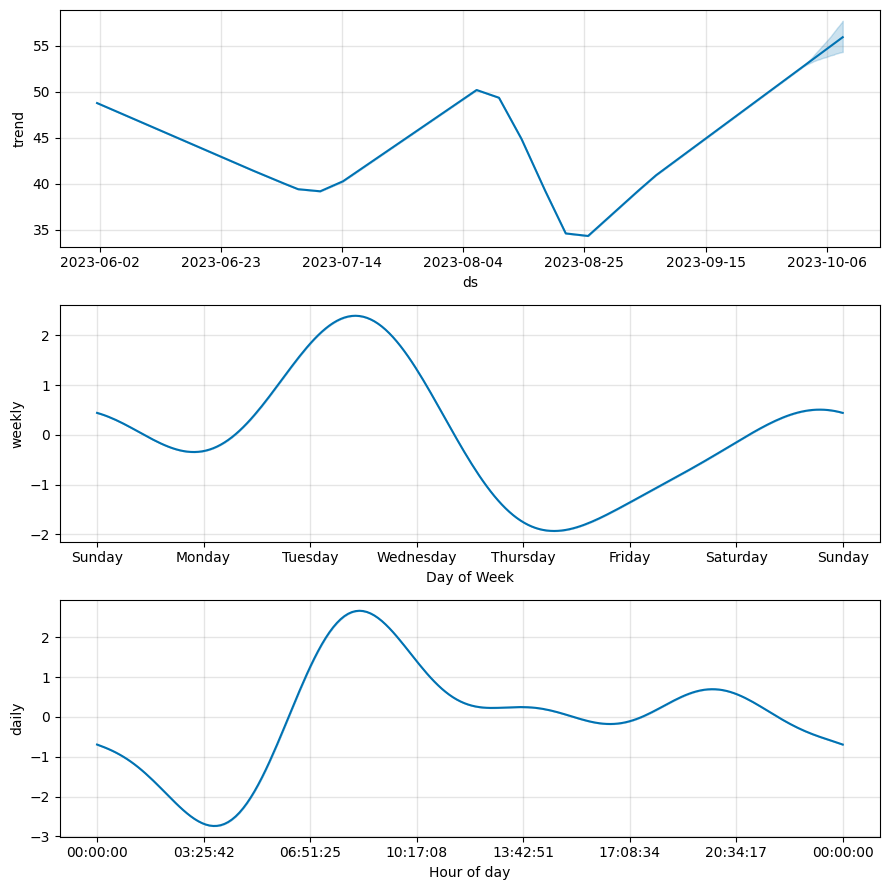

In [176]:
m2.plot_components(forecast);

In [177]:
m3 = Prophet(seasonality_mode='multiplicative')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/wliqlau7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/qo64nqcm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32509', 'data', 'file=/tmp/tmpsjz2s1nd/wliqlau7.json', 'init=/tmp/tmpsjz2s1nd/qo64nqcm.json', 'output', 'file=/tmp/tmpsjz2s1nd/prophet_modelpthkith4/prophet_model-20231017141529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


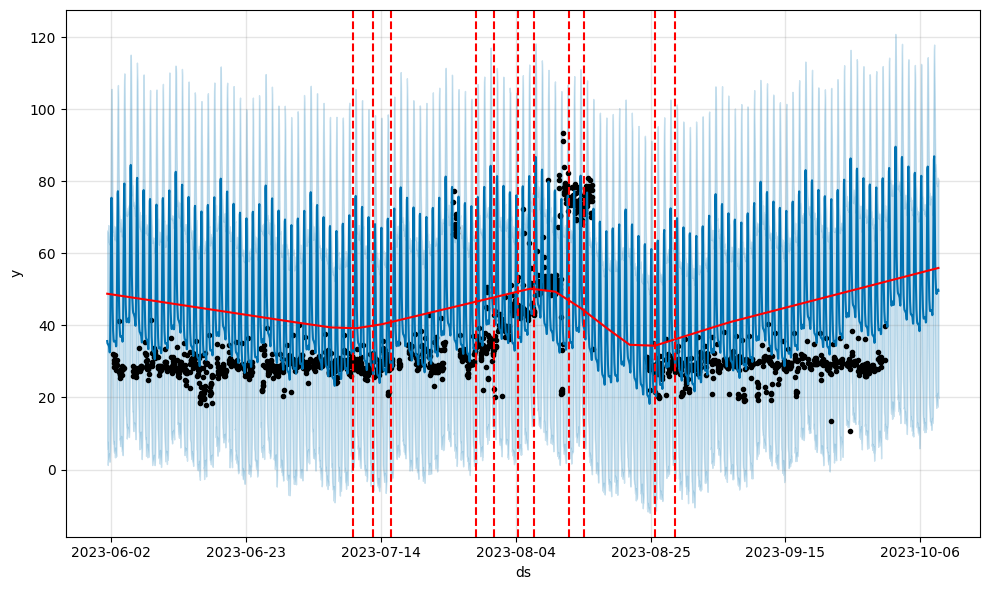

In [178]:
m3.fit(df_p2)
future2 = m2.make_future_dataframe(periods=100, freq = 'H')
forecast2 = m2.predict(future2)
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

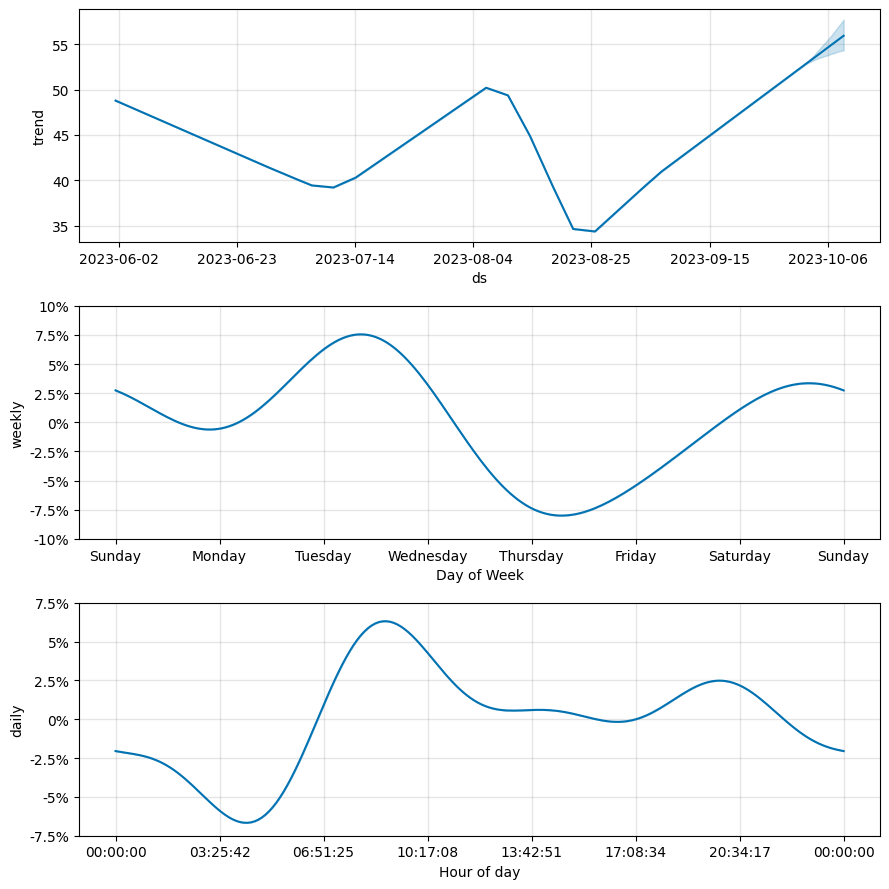

In [179]:
m3.plot_components(forecast);

In [180]:
df_p2.head()

,y,ds
Date_Time,,
2023-06-02 10:10:14,31.929834,2023-06-02 10:10:14
2023-06-02 11:10:14,29.635532,2023-06-02 11:10:14
2023-06-02 12:10:14,30.289629,2023-06-02 12:10:14
2023-06-02 13:10:14,28.462751,2023-06-02 13:10:14
2023-06-02 14:10:14,31.812954,2023-06-02 14:10:14


In [200]:
logdf = df_p2.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-06-02 10:10:14,3.463541,2023-06-02 10:10:14
2023-06-02 11:10:14,3.388974,2023-06-02 11:10:14
2023-06-02 12:10:14,3.410805,2023-06-02 12:10:14
2023-06-02 13:10:14,3.348596,2023-06-02 13:10:14
2023-06-02 14:10:14,3.459874,2023-06-02 14:10:14


In [201]:
m3 = Prophet()

In [202]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/ajvaa3kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjz2s1nd/y90_j2wk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68290', 'data', 'file=/tmp/tmpsjz2s1nd/ajvaa3kg.json', 'init=/tmp/tmpsjz2s1nd/y90_j2wk.json', 'output', 'file=/tmp/tmpsjz2s1nd/prophet_modelw8s8sgcl/prophet_model-20231017150153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [203]:
future = m3.make_future_dataframe(periods=100, freq = 'H')

In [204]:
forecast = m3.predict(future)

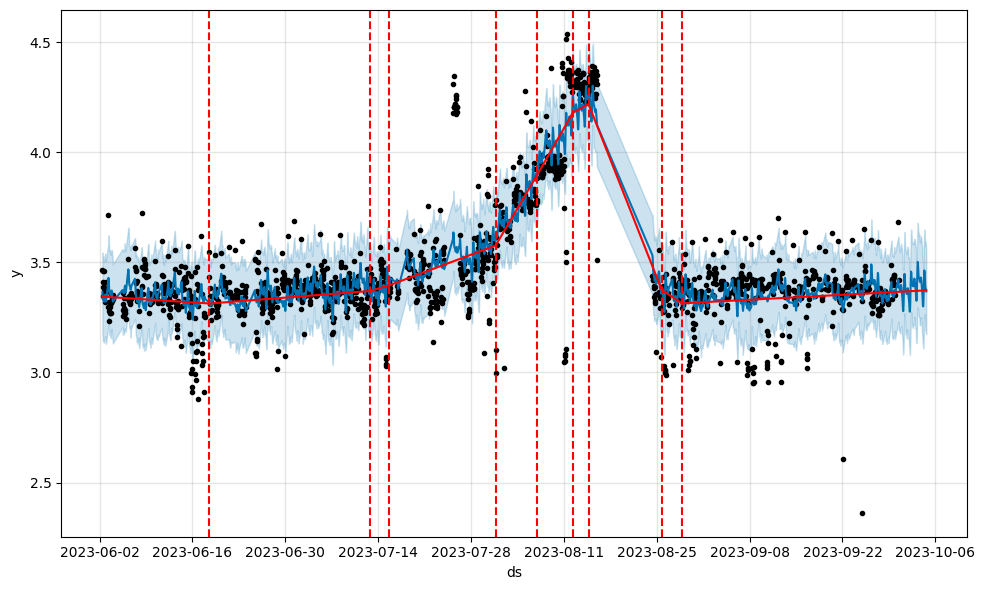

In [205]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

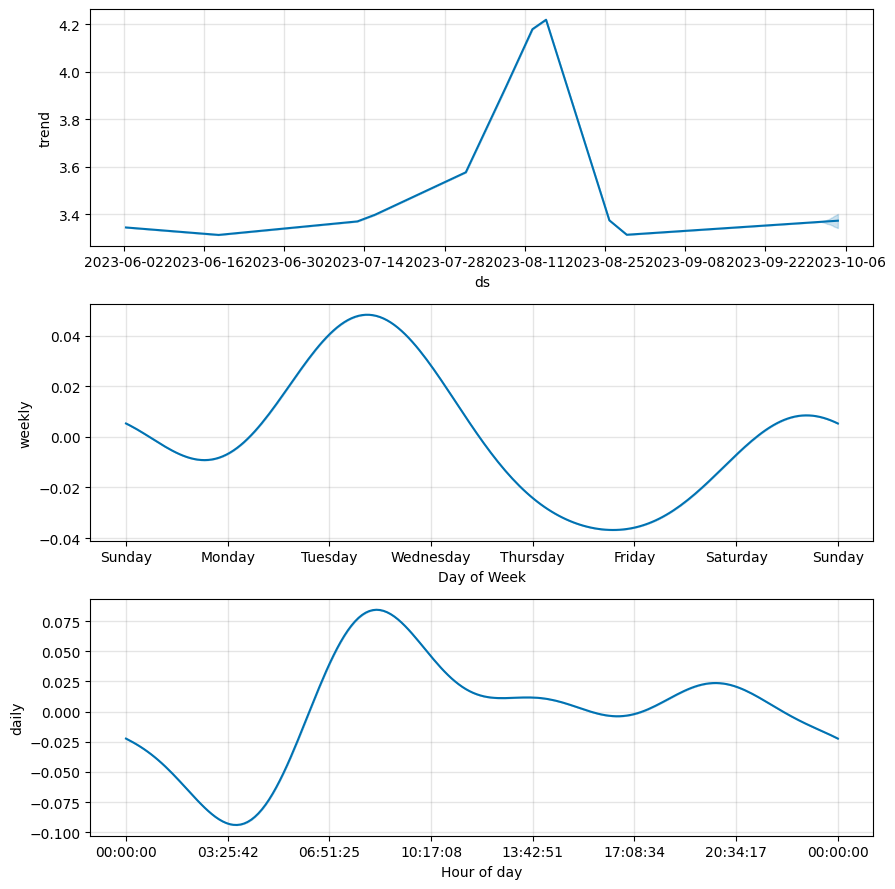

In [206]:
m3.plot_components(forecast);